In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.dummy import DummyRegressor
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/zadanie_2/data/zadanie2_gzip.csv', sep="|",compression="gzip")

In [ ]:
df

,timeID,czas,manip_przeplywPowietrza,manip_stezenieTlenu,manip_predkoscDmuchu,manip_pylyProcesowe,straty_laczne,straty_pasG,straty_pierscien600,straty_pierscien500,straty_pierscien300,straty_pierscien100,zaklucaj_mieszankaKonc,zaklucaj_prazonka,zaklucaj_zuzelPB,zaklucaj_tlenDoLancy,zaklucaj_tlenDoDmuchu,zaklucaj_powietrzeDoDmuchu,zaklucaj_przetlenienie,zaklucaj_mieszankaWegla,zaklucaj_mieszankaSiarki,zaklucaj_mieszankaNadziarno,zaklucaj_mieszankaPodziarno,zaklucaj_poziomTopu,zaklucane_kadDystrybucji,zaklucane_stratyLaczneOdstojnik,zaklucane_tempZuzla,zaklucane_drganiaKO
0,0,2021-04-19 0:00:00,2700.0,81.0,50.0,31.0,23.298206,0.870960,1.513844,7.206612,7.292219,6.445967,114.0,10.0,3.0,350.000000,31570.68359,9822.601563,303.0,8.61,11.27,2.10,62.000000,1250,13.727884,9.327152,1306.0,-0.128922
1,1,2021-04-19 0:00:01,2700.0,81.0,50.0,31.0,23.303154,0.870934,1.513818,7.207745,7.292501,6.446149,114.0,10.0,3.0,350.010620,31577.13672,9820.554688,303.0,8.61,11.27,2.34,62.799999,1360,13.726639,9.329683,1305.0,-0.328362
2,2,2021-04-19 0:00:02,2700.0,81.0,50.0,31.0,23.308102,0.870908,1.513792,7.208877,7.293985,6.446331,114.0,10.0,3.0,349.990967,31583.59375,9818.508789,303.0,8.61,11.27,2.34,62.799999,1360,13.725391,9.332214,1305.0,-0.113587
3,3,2021-04-19 0:00:03,2700.0,81.0,50.0,31.0,23.313053,0.870881,1.513766,7.210010,7.295469,6.446513,114.0,10.0,3.0,349.971375,31590.04688,9816.461914,303.0,8.61,11.27,2.34,62.799999,1360,13.724146,9.334154,1305.0,0.101188
4,4,2021-04-19 0:00:04,2700.0,81.0,50.0,31.0,23.318001,0.870855,1.513740,7.211143,7.296953,6.446695,114.0,10.0,3.0,349.951721,31596.50000,9814.416016,303.0,8.61,11.27,2.34,62.799999,1360,13.722900,9.335503,1305.0,-0.098252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953995,3953995,2021-06-06 9:59:55,2800.0,72.0,55.0,27.0,22.120504,1.024544,1.773548,6.237048,6.701443,6.367236,114.0,10.0,2.0,248.623444,28920.00977,15779.066410,289.0,8.82,10.63,2.44,66.300003,1480,13.523458,9.483140,1301.0,-4.432176
3953996,3953996,2021-06-06 9:59:56,2800.0,72.0,55.0,27.0,22.120085,1.024632,1.773745,6.236991,6.701798,6.367192,114.0,10.0,2.0,248.571442,28917.73242,15779.076170,289.0,8.82,10.63,2.44,66.300003,1480,13.525661,9.482700,1301.0,-3.680459
3953997,3953997,2021-06-06 9:59:57,2800.0,72.0,55.0,27.0,22.119665,1.024719,1.773942,6.236934,6.702155,6.367147,114.0,10.0,2.0,249.000000,28915.45508,15779.087890,289.0,8.82,10.63,2.44,66.300003,1480,13.527863,9.482262,1301.0,0.278000
3953998,3953998,2021-06-06 9:59:58,2800.0,72.0,55.0,27.0,22.119247,1.024806,1.774139,6.236877,6.702511,6.367104,114.0,10.0,2.0,248.000000,28913.17969,15779.097660,289.0,8.82,10.63,2.44,66.300003,1480,13.530066,9.481822,1301.0,4.910000


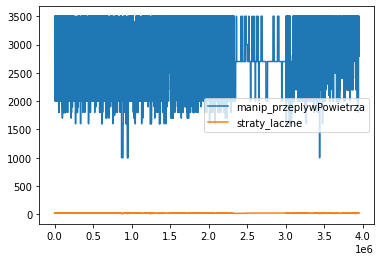

In [ ]:
df[['manip_przeplywPowietrza','straty_laczne']].plot();

In [ ]:
df[["czas"]] = df[["czas"]].apply(pd.to_datetime)

In [ ]:
df

,timeID,czas,manip_przeplywPowietrza,manip_stezenieTlenu,manip_predkoscDmuchu,manip_pylyProcesowe,straty_laczne,straty_pasG,straty_pierscien600,straty_pierscien500,straty_pierscien300,straty_pierscien100,zaklucaj_mieszankaKonc,zaklucaj_prazonka,zaklucaj_zuzelPB,zaklucaj_tlenDoLancy,zaklucaj_tlenDoDmuchu,zaklucaj_powietrzeDoDmuchu,zaklucaj_przetlenienie,zaklucaj_mieszankaWegla,zaklucaj_mieszankaSiarki,zaklucaj_mieszankaNadziarno,zaklucaj_mieszankaPodziarno,zaklucaj_poziomTopu,zaklucane_kadDystrybucji,zaklucane_stratyLaczneOdstojnik,zaklucane_tempZuzla,zaklucane_drganiaKO
0,0,2021-04-19 00:00:00,2700.0,81.0,50.0,31.0,23.298206,0.870960,1.513844,7.206612,7.292219,6.445967,114.0,10.0,3.0,350.000000,31570.68359,9822.601563,303.0,8.61,11.27,2.10,62.000000,1250,13.727884,9.327152,1306.0,-0.128922
1,1,2021-04-19 00:00:01,2700.0,81.0,50.0,31.0,23.303154,0.870934,1.513818,7.207745,7.292501,6.446149,114.0,10.0,3.0,350.010620,31577.13672,9820.554688,303.0,8.61,11.27,2.34,62.799999,1360,13.726639,9.329683,1305.0,-0.328362
2,2,2021-04-19 00:00:02,2700.0,81.0,50.0,31.0,23.308102,0.870908,1.513792,7.208877,7.293985,6.446331,114.0,10.0,3.0,349.990967,31583.59375,9818.508789,303.0,8.61,11.27,2.34,62.799999,1360,13.725391,9.332214,1305.0,-0.113587
3,3,2021-04-19 00:00:03,2700.0,81.0,50.0,31.0,23.313053,0.870881,1.513766,7.210010,7.295469,6.446513,114.0,10.0,3.0,349.971375,31590.04688,9816.461914,303.0,8.61,11.27,2.34,62.799999,1360,13.724146,9.334154,1305.0,0.101188
4,4,2021-04-19 00:00:04,2700.0,81.0,50.0,31.0,23.318001,0.870855,1.513740,7.211143,7.296953,6.446695,114.0,10.0,3.0,349.951721,31596.50000,9814.416016,303.0,8.61,11.27,2.34,62.799999,1360,13.722900,9.335503,1305.0,-0.098252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953995,3953995,2021-06-06 09:59:55,2800.0,72.0,55.0,27.0,22.120504,1.024544,1.773548,6.237048,6.701443,6.367236,114.0,10.0,2.0,248.623444,28920.00977,15779.066410,289.0,8.82,10.63,2.44,66.300003,1480,13.523458,9.483140,1301.0,-4.432176
3953996,3953996,2021-06-06 09:59:56,2800.0,72.0,55.0,27.0,22.120085,1.024632,1.773745,6.236991,6.701798,6.367192,114.0,10.0,2.0,248.571442,28917.73242,15779.076170,289.0,8.82,10.63,2.44,66.300003,1480,13.525661,9.482700,1301.0,-3.680459
3953997,3953997,2021-06-06 09:59:57,2800.0,72.0,55.0,27.0,22.119665,1.024719,1.773942,6.236934,6.702155,6.367147,114.0,10.0,2.0,249.000000,28915.45508,15779.087890,289.0,8.82,10.63,2.44,66.300003,1480,13.527863,9.482262,1301.0,0.278000
3953998,3953998,2021-06-06 09:59:58,2800.0,72.0,55.0,27.0,22.119247,1.024806,1.774139,6.236877,6.702511,6.367104,114.0,10.0,2.0,248.000000,28913.17969,15779.097660,289.0,8.82,10.63,2.44,66.300003,1480,13.530066,9.481822,1301.0,4.910000


In [ ]:
df["czas"].dt.normalize().unique()

array(['2021-04-19T00:00:00.000000000', '2021-04-20T00:00:00.000000000',
       '2021-04-21T00:00:00.000000000', '2021-04-22T00:00:00.000000000',
       '2021-04-23T00:00:00.000000000', '2021-04-24T00:00:00.000000000',
       '2021-04-25T00:00:00.000000000', '2021-04-26T00:00:00.000000000',
       '2021-04-27T00:00:00.000000000', '2021-04-28T00:00:00.000000000',
       '2021-04-29T00:00:00.000000000', '2021-05-08T00:00:00.000000000',
       '2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000',
       '2021-05-19T00:00:00.000000000', '2021-05-20T00:00:00.000000000',
       '2021-05-21T00:00:00.000000000', '2021-05-22T00:00:00.000000000',
       '2021-05-23T00:00:00.000000000', '2021-05-24

In [ ]:
df_sek = df[['manip_przeplywPowietrza',	'manip_stezenieTlenu', 'manip_predkoscDmuchu',	'manip_pylyProcesowe',	'straty_laczne']]

In [ ]:
df_sek

,manip_przeplywPowietrza,manip_stezenieTlenu,manip_predkoscDmuchu,manip_pylyProcesowe,straty_laczne
0,2700.0,81.0,50.0,31.0,23.298206
1,2700.0,81.0,50.0,31.0,23.303154
2,2700.0,81.0,50.0,31.0,23.308102
3,2700.0,81.0,50.0,31.0,23.313053
4,2700.0,81.0,50.0,31.0,23.318001
...,...,...,...,...,...
863996,2700.0,80.0,45.0,25.0,23.342682
863997,2700.0,80.0,45.0,25.0,23.342831
863998,2700.0,80.0,45.0,25.0,23.342979
863999,2700.0,80.0,45.0,25.0,23.343126


In [ ]:
X = np.array(df[['manip_przeplywPowietrza',	'manip_stezenieTlenu', 'manip_predkoscDmuchu',	'manip_pylyProcesowe',	'straty_laczne']])

In [ ]:
X = X[0:-100]

In [ ]:
Y = np.array(df['straty_laczne'])

In [ ]:
Y = Y[100:]

In [ ]:
(len(X),len(Y))

(3953900, 3953900)

In [ ]:
model = xgb.XGBRegressor()

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)


In [ ]:
scores

array([-0.01255737, -0.01263926, -0.01243647, -0.01230669, -0.01244562,
       -0.01260115, -0.01241495, -0.01255214, -0.01233649, -0.01241406,
       -0.01263981, -0.01252852, -0.01262873, -0.0125716 , -0.01247886,
       -0.01239753, -0.01266553, -0.01245067, -0.01233551, -0.01238816,
       -0.01243168, -0.01252802, -0.01252157, -0.01248735, -0.01250265,
       -0.01261941, -0.01271304, -0.01253656, -0.01253698, -0.0125611 ])

In [ ]:
scores_abs = abs(scores)
print('Mean MAE: %.3f (%.3f)' % (scores_abs.mean(), scores_abs.std()) )

Mean MAE: 0.013 (0.000)


In [ ]:
dummy_regr = DummyRegressor(strategy="mean")
cv_dummy = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores_dummy = cross_val_score(dummy_regr, X, Y, scoring='neg_mean_absolute_error', cv=cv_dummy, n_jobs=-1)

In [ ]:
scores_dummy

array([-1.27422685, -1.27232383, -1.27662877, -1.28055748, -1.28619261,
       -1.27822412, -1.27261233, -1.28071217, -1.27173068, -1.27534261,
       -1.27922236, -1.28448457, -1.27058152, -1.27330935, -1.27840542,
       -1.2728304 , -1.27999125, -1.27671639, -1.27766872, -1.27532578,
       -1.28000069, -1.27603792, -1.27210274, -1.27695645, -1.28363155,
       -1.2774956 , -1.27837398, -1.27810977, -1.27069851, -1.27513327])

In [ ]:
scores_abs = abs(scores_dummy)
print('Mean MAE: %.3f (%.3f)' % (scores_abs.mean(), scores_abs.std()) )

Mean MAE: 1.277 (0.004)


In [ ]:
fin_model = xgb.XGBRegressor()

In [ ]:
fin_model.fit(X,Y)

[15:59:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
y = fin_model.predict(X)

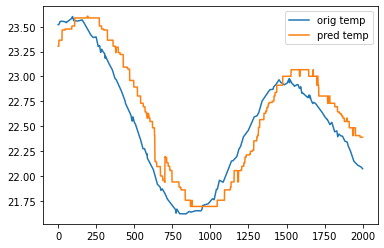

In [ ]:
plt.plot(Y[0:2000], label = "orig temp")
plt.plot(y[0:2000], label = "pred temp")
plt.legend()
plt.show()

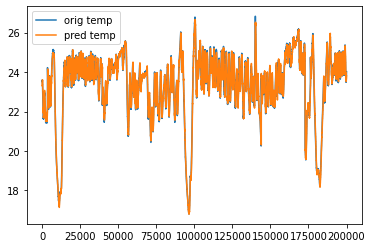

In [ ]:
plt.plot(Y[0:200000], label = "orig temp")
plt.plot(y[0:200000], label = "pred temp")
plt.legend()
plt.show()

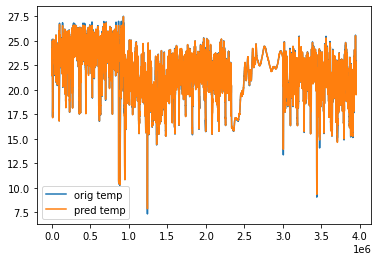

In [ ]:
plt.plot(Y, label = "orig temp")
plt.plot(y, label = "pred temp")
plt.legend()
plt.show()

In [ ]:
df3 = df[(df['czas'] >= '2021-05-08') & (df['czas'] <= '2021-05-18')]

In [ ]:
df3_sek = df3[['manip_przeplywPowietrza',	'manip_stezenieTlenu', 'manip_predkoscDmuchu',	'manip_pylyProcesowe',	'straty_laczne']]

In [ ]:
X_3 = np.array(df3[['manip_przeplywPowietrza',	'manip_stezenieTlenu', 'manip_predkoscDmuchu',	'manip_pylyProcesowe',	'straty_laczne']])
X_3 = X_3[0:-1]
len(X_3)

864000

In [ ]:
Y_3 = np.array(df3['straty_laczne'])
Y_3 = Y_3[1:]
len(Y_3)

864000

In [ ]:
y_3 = fin_model.predict(X_3)

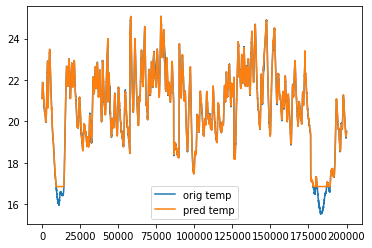

In [ ]:
plt.plot(Y_3[0:200000], label = "orig temp")
plt.plot(y_3[0:200000], label = "pred temp")
plt.legend()
plt.show()

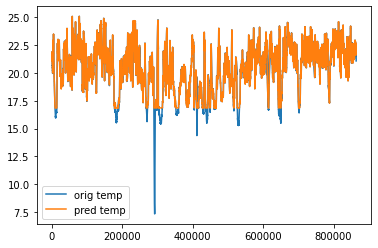

In [ ]:
plt.plot(Y_3, label = "orig temp")
plt.plot(y_3, label = "pred temp")
plt.legend()
plt.show()

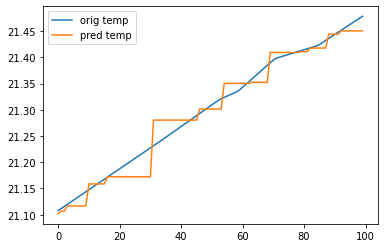

In [ ]:
plt.plot(Y_3[0:100], label = "orig temp")
plt.plot(y_3[0:100], label = "pred temp")
plt.legend()
plt.show()

In [ ]:
import pickle
file_name = "/content/drive/MyDrive/zadanie_2/models/xgb_piec_all_z_temp_100s.pkl"

# save
pickle.dump(fin_model, open(file_name, "wb"))

# load
#xgb_model_loaded = pickle.load(open(file_name, "rb"))

In [ ]:
xgb_model_loaded = pickle.load(open(file_name, "rb"))

[11:56:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
xgb_model_loaded.predict([list(X[0])])[0]

23.295242

In [ ]:
X[0]

array([2700.        ,   81.        ,   50.        ,   31.        ,
         23.29820633])